In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import skimage
from skimage import filters, segmentation
import os

In [2]:
images = np.load('900C_driftcorrect.npy',mmap_mode='r+')[:,10:-10,10:-10]
data = np.load('900C_out.npy',mmap_mode='r+')[:,10:-10,10:-10]
print(images.shape)

(800, 3230, 3230)


0.6227055568159774


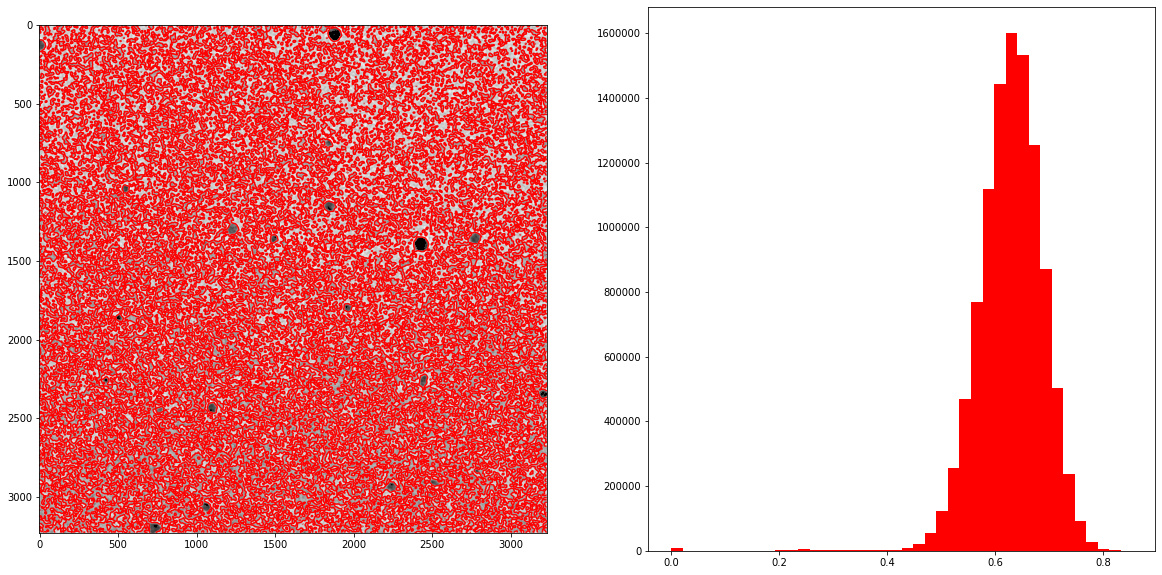

In [9]:
def norm(im):
    return (im - np.min(im)) / (np.max(im) - np.min(im))

#n = int(np.random.rand()*len(data))
n = 700
f,a = plt.subplots(figsize=(20,10),ncols=2)
a[0].imshow(data[n],plt.cm.gray)
#a[0].contour(data[n],[0.5],colors=['red'])

a[0].contour(norm(data[n]),[filters.threshold_otsu(norm(data[n]))],colors=['red'])
#a[0].imshow(data[n],plt.cm.gray)
a[1].hist(data[n].reshape(-1,1),40,color='red')
print(filters.threshold_otsu(data[n]))

In [ ]:
f,a = plt.subplots(figsize=(10,10))
a.imshow(images[n],plt.cm.gray)
a.imshow(cv[0],plt.cm.jet,alpha=0.2)

In [ ]:
thresh = (data[n] < filters.threshold_otsu(data[n])).astype(int)
cv = segmentation.chan_vese(images[n], mu=0.5, lambda1=1, lambda2=0.5, tol=1e-4, max_iter=300,
               dt=0.5, init_level_set=thresh, extended_output=True)

In [ ]:
print(len(cv[2]))
plt.plot(np.arange(0,len(cv[2])),cv[2])

In [ ]:
len(cv[2])

In [3]:
#os.mkdir('segmentation_movie')
for i in range(len(images)):
    if i % 50 == 0:
        print(i)
    f,a = plt.subplots(figsize=(10,10))
    a.imshow(images[i,50:-50,50:-50],cmap='gray')
    a.contour(data[i,50:-50,50:-50],[filters.threshold_otsu(data[i])],colors=['red'])
    a.axis('off')
    plt.tight_layout()
    f.savefig('segmentation_movie/{:>04d}.png'.format(i))
    plt.close()

0
50
100
150


/home/jay/anaconda3/envs/main/lib/python3.7/site-packages/ipykernel_launcher.py:7: UserWarning: No contour levels were found within the data range.
  import sys


200
250
300
350
400
450
500
550
600
650
700
750


In [ ]:
import io
import base64
from IPython.display import HTML

video = io.open('segmentation_movie.mp4','r+b').read()
encoded = base64.b64encode(video)
video